# 第5回課題
第5回課題では，以下の項目を満たすように分析してください．

明確な解答は用意していませんが，少なくとも間違っていないと言える推論をするようにしてください．

- データの取得
- データの確認
 - 特徴量の確認
 - ラベルの確認
- 仮説を立てる
- データの分析
- モデルの訓練
- 予測
- 精度の確認
- 仮説の確認

# データの取得
wine data 以外を利用してデータ分析してください．

なるべく，ラベルと属性から推論が立てやすいデータを選択するとやりやすいです．

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv("train.csv")
data_int = pd.read_csv("train.csv")[["id", "age", "balance", "day", "duration", "pdays", "previous", "y"]]

# データの確認
データ分析以前にわかることを確認．特徴量の属性やドメイン知識など
- 特徴量の確認
- ラベルの確認

In [2]:
# ラベルの確認
print(data.keys())

# 0	    id	        int	行の通し番号
# 1	    age	        int	年齢
# 2	    job	        varchar	職種
# 3	    marital	    varchar	未婚/既婚
# 4	    education	varchar	教育水準
# 5	    default	    varchar	債務不履行があるか（yes, no）
# 6	    balance	    int	年間平均残高（€）
# 7	    housing	    varchar	住宅ローン（yes, no）
# 8	    loan	    varchar	個人ローン（yes, no）
# 9	    contact	    varchar	連絡方法
# 10	day	        int	最終接触日
# 11	month	    char	最終接触月
# 12	duration	int	最終接触時間（秒）
# 13	compaign	int	現キャンペーンにおける接触回数
# 14	pdays	    int	経過日数：前キャンペーン接触後の日数
# 15	previous	int	接触実績：現キャンペーン以前までに顧客に接触した回数
# 16	poutcome	varchar	前回のキャンペーンの成果
# 17	y	        boolean	定額預金申し込み有無（1:有り, 0:無し）

Index(['id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')


# 仮説を立てる
データについて，導きたい仮説と結論を整理してください．

In [3]:
# duration(最終接触時間)が長いということは，この銀行に興味を抱いていることとなり，定額預金の申し込みの率が上昇すると考えられる。
# 一方，duration(最終接触時間)が長いということは，この銀行に興味を持っていないこととなり，定額預金の申し込み率も減少すると考えられる。
# そのため，y(定額預金申し込み有無)は，duration(最終接触時間)に影響を受けていると仮定する。

# データの分析

            age   balance       day  duration     pdays  previous  y
0      0.272727  0.078945  0.066667  0.190931  0.000000  0.000000  1
1      0.428571  0.076073  0.566667  0.034974  0.000000  0.000000  1
2      0.233766  0.066832  0.400000  0.115291  0.683486  0.007273  1
3      0.584416  0.067181  0.800000  0.086011  0.000000  0.000000  1
4      0.168831  0.066080  0.966667  0.102074  0.011468  0.007273  1
...         ...       ...       ...       ...       ...       ... ..
27123  0.311688  0.076183  0.033333  0.056730  0.309633  0.007273  0
27124  0.207792  0.069429  0.466667  0.073607  0.000000  0.000000  0
27125  0.233766  0.063281  0.233333  0.082351  0.000000  0.000000  0
27126  0.194805  0.064749  0.366667  0.015453  0.000000  0.000000  0
27127  0.142857  0.063199  0.566667  0.021350  0.408257  0.007273  0

[27128 rows x 7 columns]


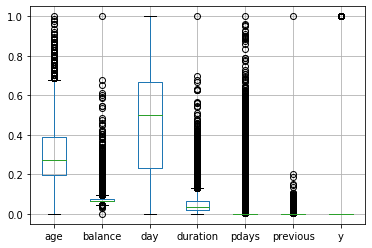

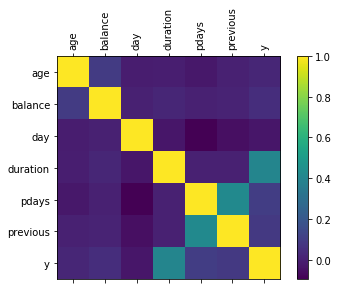

[['duration', 'y', 0.40139042940681235], ['pdays', 'previous', 0.4216059864921596], ['previous', 'pdays', 0.4216059864921596], ['y', 'duration', 0.40139042940681235]]


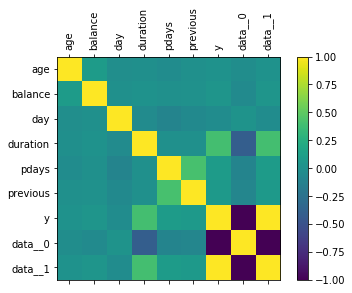

[['duration', 'y', 0.40139042940681235], ['duration', 'data__0', -0.40139042940681224], ['duration', 'data__1', 0.40139042940681235], ['pdays', 'previous', 0.4216059864921596], ['previous', 'pdays', 0.4216059864921596], ['y', 'duration', 0.40139042940681235], ['y', 'data__0', -1.0], ['data__0', 'duration', -0.40139042940681224], ['data__0', 'y', -1.0], ['data__0', 'data__1', -1.0], ['data__1', 'duration', 0.40139042940681235], ['data__1', 'data__0', -1.0]]


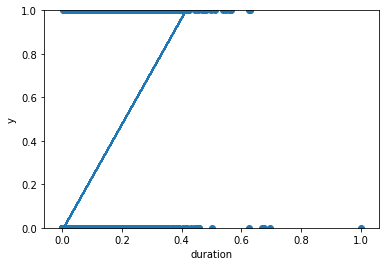

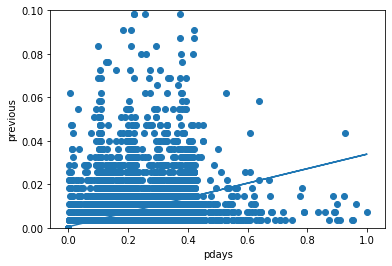

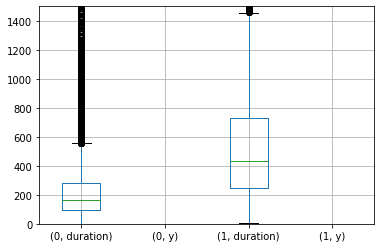

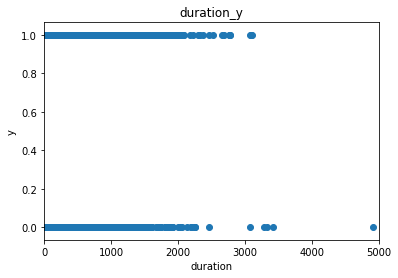

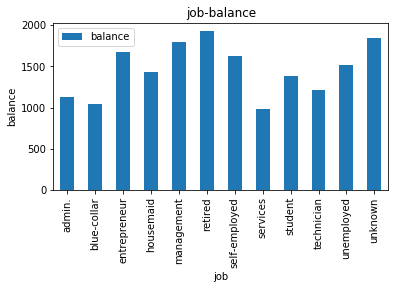

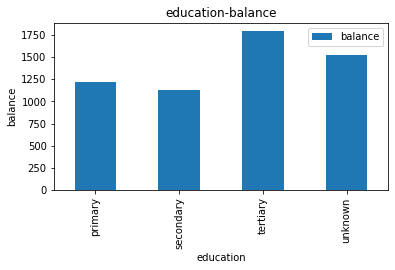

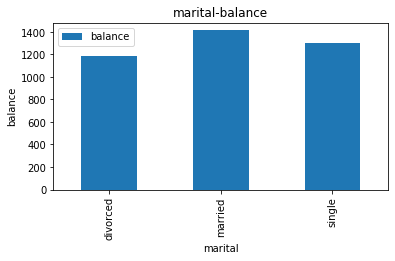

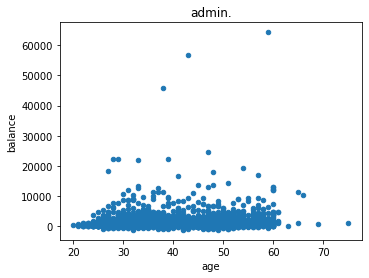

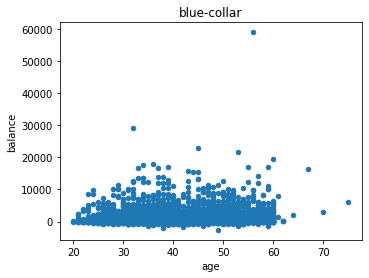

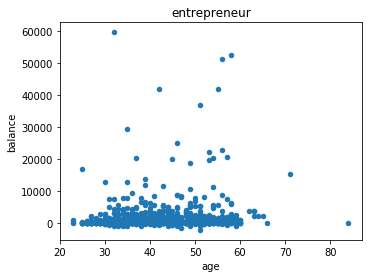

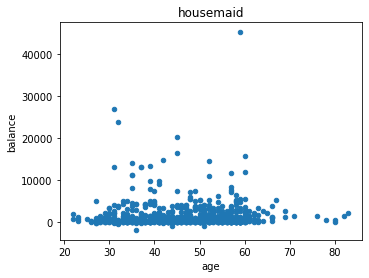

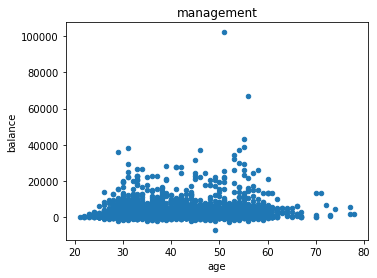

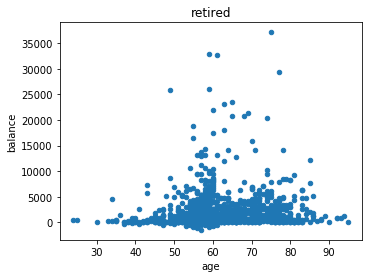

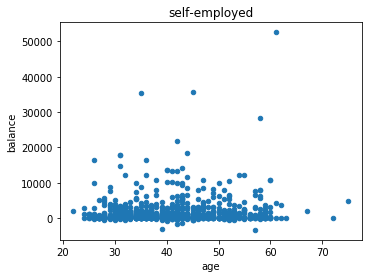

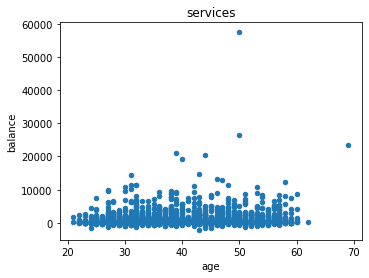

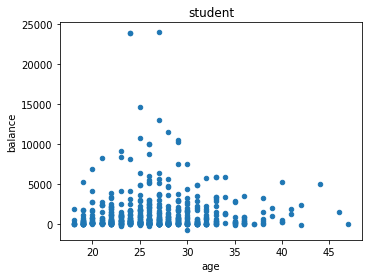

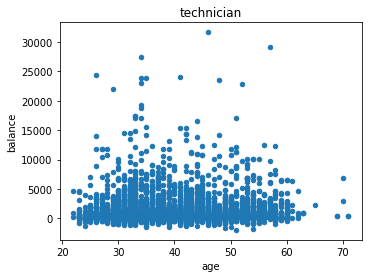

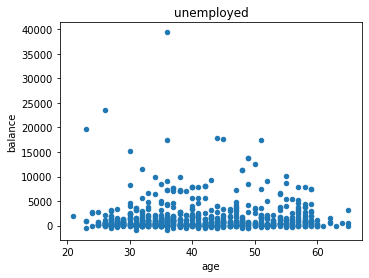

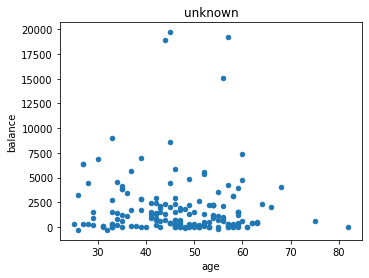

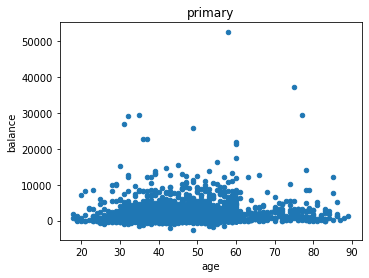

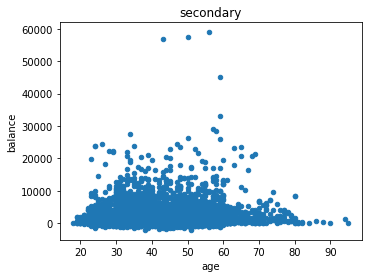

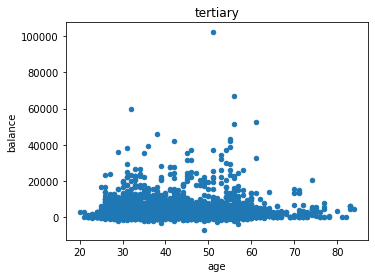

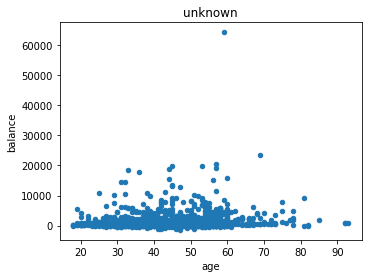

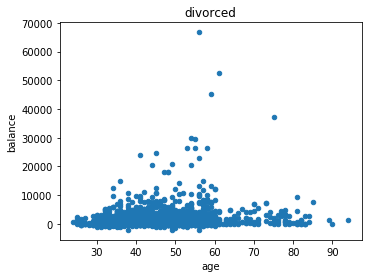

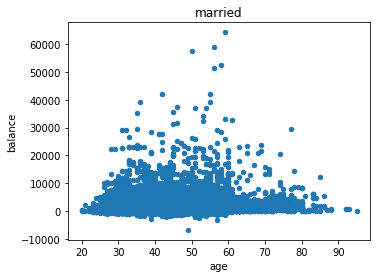

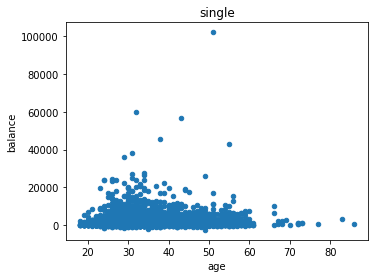

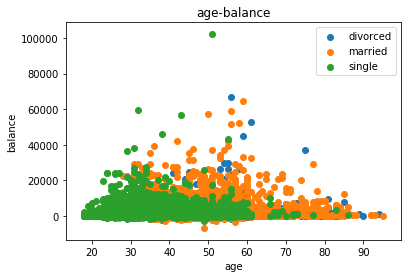

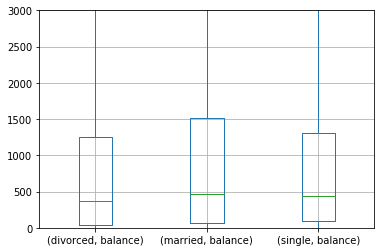

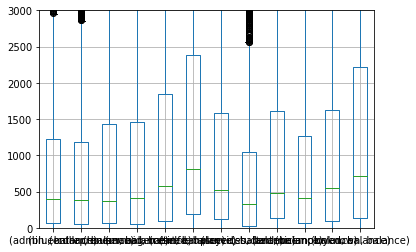

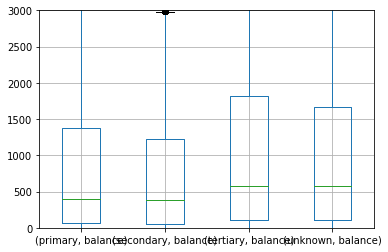

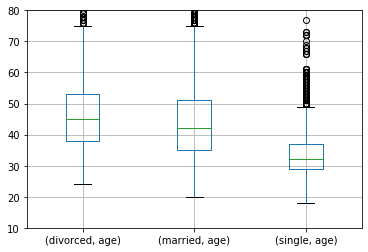

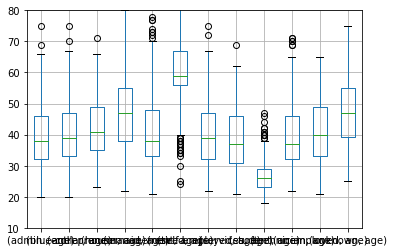

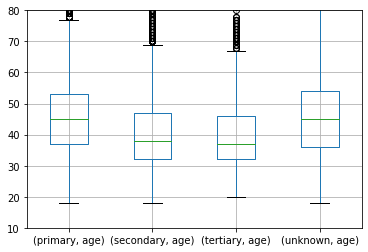

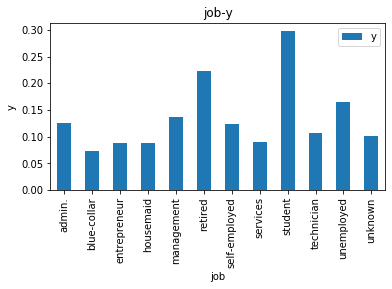

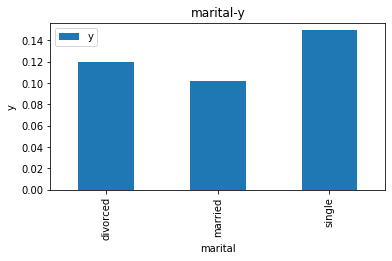

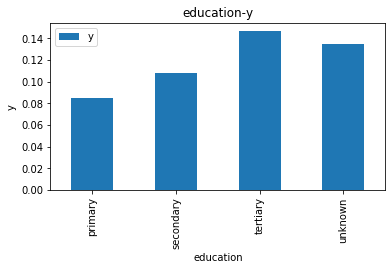

In [4]:
# 正規化
from sklearn import preprocessing
data_norm = preprocessing.MinMaxScaler().fit_transform(pd.read_csv("train.csv")[["age", "balance", "day", "duration", "pdays", "previous"]])
data_norm = pd.DataFrame(data_norm, columns=["age", "balance", "day", "duration", "pdays", "previous"])
data_norm = pd.concat([data_norm, pd.DataFrame(data["y"], columns=["y"])], axis=1)
print(data_norm)


# 箱ひげ図
data_norm.boxplot()
plt.show()


# 相関
fig = plt.figure()
plt.matshow(data_norm.corr("pearson"), fignum=fig.number)
plt.xticks(np.arange(data_norm.shape[1]), data_norm.columns, rotation=90)
plt.yticks(range(data_norm.shape[1]), data_norm.columns)
plt.colorbar()
plt.show()
corr = data_norm.corr().values
print([[data_norm.columns[i], data_norm.columns[j], corr[i][j]]
       for i in range(data_norm.shape[1])
       for j in range(data_norm.shape[1])
       if abs(corr[i][j]) >= 0.4 and corr[i][j] != 1])
# ['duration', 'y', 0.40139042940686714]
# ['pdays', 'previous', 0.42160598649194475]
# に相関がある


# ターゲットのカテゴリをダミー変数に
# ['duration', 'y', 0.40139042940686714]
# ['duration', 'data__0', -0.4013904294068674]
# ['duration', 'data__1', 0.40139042940686714]
# ['pdays', 'previous', 0.42160598649194475]
data_dummy = pd.concat([data_norm, pd.get_dummies(data_norm["y"], prefix="data_")], axis=1)
data_dummy.head()
fig = plt.figure()
plt.matshow(data_dummy.corr("pearson"), fignum=fig.number)
plt.xticks(range(data_dummy.shape[1]), data_dummy.columns, rotation=90)
plt.yticks(range(data_dummy.shape[1]), data_dummy.columns)
plt.colorbar()
plt.show()
corr = data_dummy.corr().values
print([[data_dummy.columns[i], data_dummy.columns[j], corr[i][j]]
       for i in range(data_dummy.shape[1])
       for j in range(data_dummy.shape[1])
       if abs(corr[i][j]) >= 0.4 and corr[i][j] != 1])


# 回帰分析
# ['duration', 'y', 0.40139042940686714]
# ['pdays', 'previous', 0.42160598649194475]
# の関係に注目

# 線形モデル
from sklearn import linear_model
clf = linear_model.LinearRegression()

# ['duration', 'y', 0.40139042940686714]の関係
X = data_norm["duration"].values.reshape(-1, 1)
Y = data_norm["y"]
clf.fit(X, Y)
# 傾き，切片，相関係数の2乗
clf.coef_, clf.intercept_, clf.score(X, Y)
plt.plot(X, clf.coef_ * X + clf.intercept_)
plt.scatter(X, Y)
plt.xlabel("duration")
plt.ylabel("y")
plt.ylim([0, 1])
plt.show()

# ['pdays', 'previous', 0.42160598649194475]の関係
X = data_norm["pdays"].values.reshape(-1, 1)
Y = data_norm["previous"]
clf.fit(X, Y)
# 傾き，切片，相関係数の2乗
clf.coef_, clf.intercept_, clf.score(X, Y)
plt.plot(X, clf.coef_ * X + clf.intercept_)
plt.scatter(X, Y)
plt.xlabel("pdays")
plt.ylabel("previous")
plt.ylim([0, 0.1])
plt.show()

#######
# データ分析をした際に，y(定額預金申し込み有無)とduration(最終接触時間)は，相関係数が0.40139042940681235であることが分かる
# よって，y(定額預金申し込み有無)とduration(最終接触時間)は影響しあっていることが数値からも確認することが出来る。
#######

# y(定額預金申し込み有無)とduration(最終接触時間)の関係に注目してさらに検証する

# y(定額預金申し込み有無)とduration(最終接触時間)の箱ひげ図
# 定額預金の申し込みした方が，duration全体的な分布の高さを確認できる
data_b_y = pd.read_csv("train.csv")[["duration", "y"]].groupby("y")
data_b_y.boxplot(subplots=False)
plt.ylim([0, 1500])
plt.show()

# y(定額預金申し込み有無)とduration(最終接触時間)の散布図
# あまり何も確認できず
fig, ax = plt.subplots()
ax.scatter(data_int["duration"], data_int["y"])
plt.title("duration_y")
plt.xlabel("duration")
plt.ylabel("y")
plt.xlim([0, 5000])
plt.show()


################################
# 以下参考
# job と　balance の関係
data_job_balance_gr = pd.read_csv("train.csv")[["job", "balance"]].groupby("job")
# print(data_job_balance_gr.size())
# print(data_job_balance_gr.describe().stack())
# print(data_job_balance_gr.mean())
data_job_balance_gr.mean().plot.bar()
plt.title("job-balance")
plt.xlabel("job")
plt.ylabel("balance")
plt.subplots_adjust(bottom=0.3)
plt.show()

# education と　balance の関係
data_education_balance_gr = pd.read_csv("train.csv")[["education", "balance"]].groupby("education")
data_education_balance_gr.mean().plot.bar()
plt.title("education-balance")
plt.xlabel("education")
plt.ylabel("balance")
plt.subplots_adjust(bottom=0.3)
plt.show()

# marital と　balance の関係
data_marital_balance_gr = pd.read_csv("train.csv")[["marital", "balance"]].groupby("marital")
data_marital_balance_gr.mean().plot.bar()
plt.title("marital-balance")
plt.xlabel("marital")
plt.ylabel("balance")
plt.subplots_adjust(bottom=0.3)
plt.show()

# job各項目で、　balance　と age　の関係
dataJ_balance_age = pd.read_csv("train.csv")[["job", "balance", "age"]].groupby("job")
for name, group in dataJ_balance_age:
     group.plot.scatter(x="age", y="balance")
     plt.title(name)
     plt.subplots_adjust(left=0.2)
     plt.show()

# education各項目で、　balance　と age　の関係
dataE_balance_age = pd.read_csv("train.csv")[["education", "balance", "age"]].groupby("education")
for name, group in dataE_balance_age:
     group.plot.scatter(x="age", y="balance")
     plt.title(name)
     plt.subplots_adjust(left=0.2)
     plt.show()

# martial各項目で、　balance　と age　の関係
dataM_balance_age = pd.read_csv("train.csv")[["marital", "balance", "age"]].groupby("marital")
for name, group in dataM_balance_age:
     group.plot.scatter(x="age", y="balance" )
     plt.title(name)
     plt.subplots_adjust(left=0.2)
     plt.show()

# martial各項目で、　balance　と age　の関係
# 一つの散布図で
fig, ax = plt.subplots()
for name, group in dataM_balance_age:
    ax.scatter(group.age, group.balance, label=name)
    ax.legend()
plt.title("age-balance")
plt.xlabel("age")
plt.ylabel("balance")
plt.show()

#箱ひげ図
dataM_balance = pd.read_csv("train.csv")[["marital", "balance"]].groupby("marital")
dataM_balance.boxplot(subplots=False)
plt.ylim([0, 3000])
plt.show()

dataJ_balance = pd.read_csv("train.csv")[["job", "balance"]].groupby("job")
dataJ_balance.boxplot(subplots=False)
plt.ylim([0, 3000])
plt.show()

dataE_balance = pd.read_csv("train.csv")[["education", "balance"]].groupby("education")
dataE_balance.boxplot(subplots=False)
plt.ylim([0, 3000])
plt.show()

dataM_age = pd.read_csv("train.csv")[["marital", "age"]].groupby("marital")
dataM_age.boxplot(subplots=False)
plt.ylim([10, 80])
plt.show()

dataJ_age = pd.read_csv("train.csv")[["job", "age"]].groupby("job")
dataJ_age.boxplot(subplots=False)
plt.ylim([10, 80])
plt.show()

dataE_age = pd.read_csv("train.csv")[["education", "age"]].groupby("education")
dataE_age.boxplot(subplots=False)
plt.ylim([10, 80])
plt.show()

# job と　y の関係
data_job_y_gr = pd.read_csv("train.csv")[["job", "y"]].groupby("job")
data_job_y_gr.mean().plot.bar()
plt.title("job-y")
plt.xlabel("job")
plt.ylabel("y")
plt.subplots_adjust(bottom=0.3)
plt.show()

# marital と　y の関係
data_marital_y_gr = pd.read_csv("train.csv")[["marital", "y"]].groupby("marital")
data_marital_y_gr.mean().plot.bar()
plt.title("marital-y")
plt.xlabel("marital")
plt.ylabel("y")
plt.subplots_adjust(bottom=0.3)
plt.show()

# education と　y の関係
data_education_y_gr = pd.read_csv("train.csv")[["education", "y"]].groupby("education")
data_education_y_gr.mean().plot.bar()
plt.title("education-y")
plt.xlabel("education")
plt.ylabel("y")
plt.subplots_adjust(bottom=0.3)
plt.show()


# モデルの訓練
データは分割するようにしてください．交叉検証についてはまだ説明したいので自由にしてください．

また，モデルの訓練およびデータ分割時に乱数の指定がないなど再現性がなさそうなコードは認めないことにします．

モデルは自由ですが，sklearn を想定しています．自作ライブラリも可ですが，自作の場合，該当箇所は適当に読みます．

In [5]:
# モデルの学習
# データを分割し，学習用データと評価用データを作成
from sklearn.model_selection import train_test_split
train, test = train_test_split(data_norm, test_size=0.33, random_state=1)

train_X = train[["age", "balance", "day", "duration", "pdays", "previous"]]
train_Y = train[["y"]]
test_X = test[["age", "balance", "day", "duration", "pdays", "previous"]]
test_Y = test[["y"]]

In [6]:
train_X.shape,train_Y.shape,test_X.shape,test_Y.shape

((18175, 6), (18175, 1), (8953, 6), (8953, 1))

In [7]:
# SVM訓練
from sklearn.svm import SVC
clf = SVC(random_state=0)
clf.fit(train_X, train_Y)

C:\Users\doi\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

# 予測

In [8]:
# SVM予測
pred = clf.predict(test_X)

# 精度の確認

In [9]:
# SVM評価
# accuracy　正答率, precision　適合率, recall　再現率, f値
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(accuracy_score(pred, test_Y))
print(precision_score(pred, test_Y, average=None))
print(recall_score(pred, test_Y, average=None))
print(f1_score(pred, test_Y, average=None))

0.8841729029375628
[0.99608536 0.0270793 ]
[0.88689004 0.47457627]
[0.93832154 0.05123513]


0.8546855802524294
[0.91539336 0.38974855]
[0.91992386 0.37558248]
[0.91765302 0.38253441]


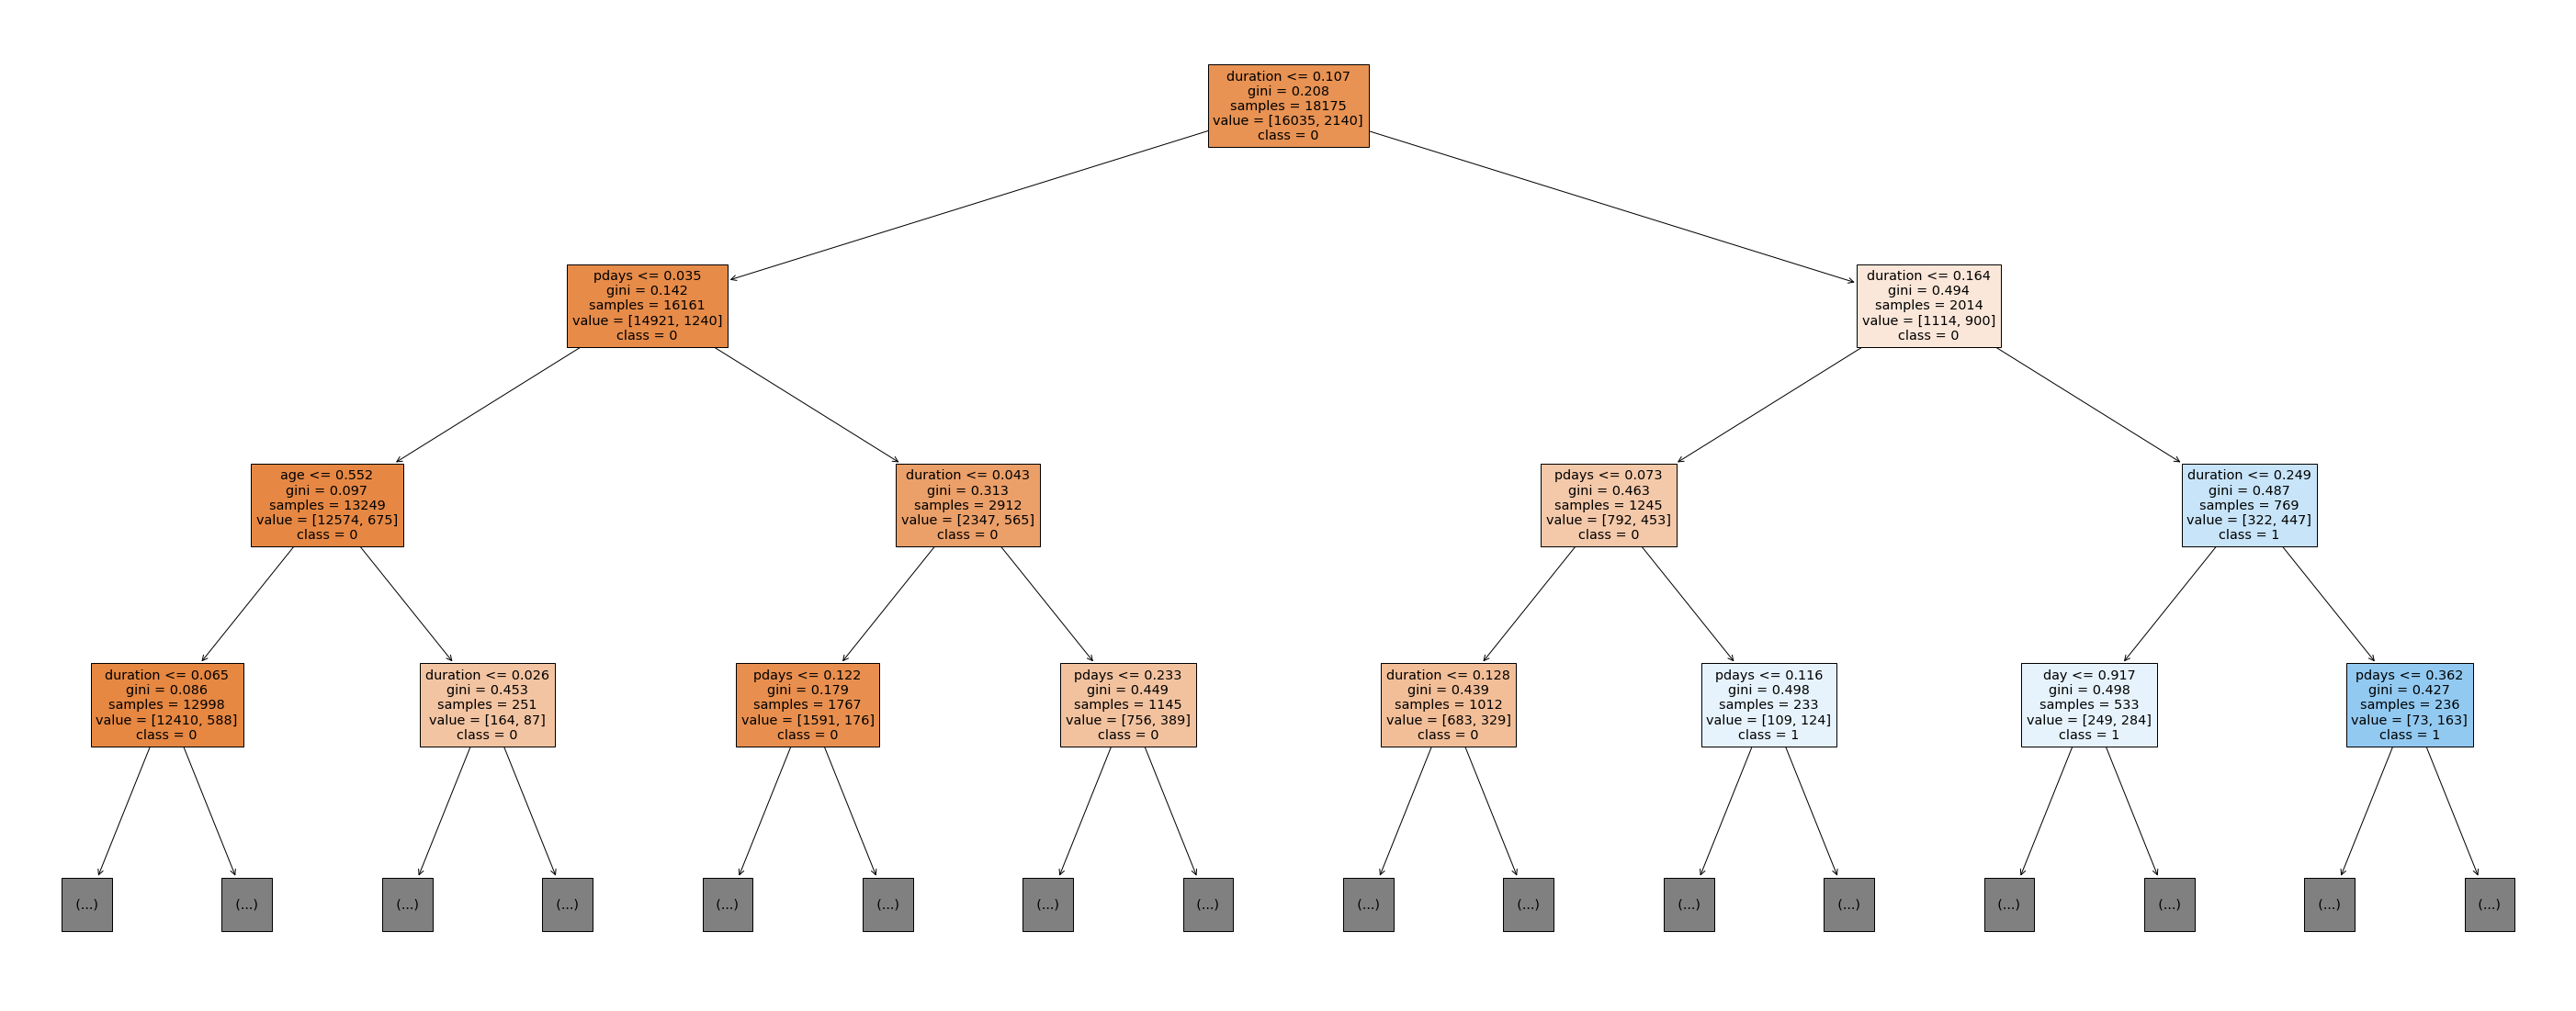

In [13]:
# 決定木訓練
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(train_X, train_Y)

#　決定木予測
pred = clf.predict(test_X)

# 決定木評価
# accuracy　正答率, precision　適合率, recall　再現率, f値
print(accuracy_score(pred, test_Y))
print(precision_score(pred, test_Y, average=None))
print(recall_score(pred, test_Y, average=None))
print(f1_score(pred, test_Y, average=None))

# 可視化
plt.figure(figsize=(50, 20))
tree.plot_tree(clf, feature_names=["age", "balance", "day", "duration", "pdays", "previous"], class_names=["0", "1"],
               filled=True, max_depth=3)
plt.show()


# 仮説の確認
最初に立てた仮説を確認してください．

予測傾向など精度ベースでも仮説を確認することはできますが，決定木や可視化を用いる方が楽かもしれません．

In [ ]:
# 決定木からも、y(定額預金申し込み有無)の決定に関して、duration(最終接触時間（秒）) が
# 大きく関わっていることが確認できた
# データを選択した際は，jobやage と大きく関わっているのではないかと考えたが，
# duration(最終接触時間（秒）),pdays(経過日数：前キャンペーン接触後の日数)の方が影響を及ぼしていることが分かり，
# キャンペーンの申し込みは，個人の置かれた状況以上に，直近の銀行への興味度合が大きいことが分かった。